In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
from pathlib import Path
from glob import glob
import re


import pdb
import h5py
import nibabel as nib
import sys
sys.path.append('../') # using sys to import from parent directory
from utils.mymath import ifft2c, fft2c
from cascadenet_pytorch.dnn_io import from_tensor_format

In [3]:
def normalized(complex_data_im, t_mean=8.762e-05, t_std=1.559e-04):
    phase = np.angle(complex_data_im)
    magnitude = np.abs(complex_data_im)
    normalized_magnitude = (magnitude - t_mean) / t_std
    im = normalized_magnitude * np.exp(1j * phase)
    k = fft2c(im)
    return im, k

def show_statistics(demo):
    demo_real = demo.real
    demo_imag = demo.imag
    demo_abs = np.abs(demo)
    print('real mean, std:', np.mean(demo_real), np.std(demo_real))
    print('real max, min:', np.max(demo_real), np.min(demo_real))
    print('imag mean, std:', np.mean(demo_imag), np.std(demo_imag))
    print('imag max, min:', np.max(demo_imag), np.min(demo_imag))
    print('abs mean, std:', np.mean(demo_abs), np.std(demo_abs))
    print('abs max, min:', np.max(demo_abs), np.min(demo_abs))
    
def crop_cmrx(im):
    # if 4 dim:
    if len(im.shape) == 4:
        _, _, kx, ky = im.shape
        im_crop = im[:,:,kx//3:2*kx//3, ky//4:3*ky//4]
    elif len(im.shape) == 2:
        kx, ky = im.shape
        im_crop = im[kx//3:2*kx//3, ky//4:3*ky//4]
    return im_crop

def inspect_tensor_numpy(data_path=None):
    t_im = np.load(data_path)
    t_im_demo = t_im[0,0,:,:,0] + t_im[0,1,:,:,0] * 1j
    return t_im_demo

def npy_to_ax(ax, path, is_save=False, s=0, t=0):
    pred_n_now = np.load(path)
    
    if pred_n_now.ndim == 5:
        pred_n_now = from_tensor_format(pred_n_now)
    print(pred_n_now.shape)
    ax.imshow(np.abs(pred_n_now[s,t,...]), cmap='gray')
    
    if is_save:
        return np.abs(pred_n_now[s,t,...])
    
    
def loadernpy_to_ax(ax, path):
    data= np.load(path)
    assert data.shape[0] == 2
    data_complex = data[0,...] + 1j * data[1,...]
    # 171 72 9 
    data_complex = np.transpose(data_complex, (2,0,1))
    ax.imshow(np.abs(data_complex[0,...]), cmap='gray')

(1, 9, 171, 72)
(1, 9, 171, 72)
(1, 9, 171, 72)


Text(0.5, 1.0, 'IF(out) - IF(k0), normalized')

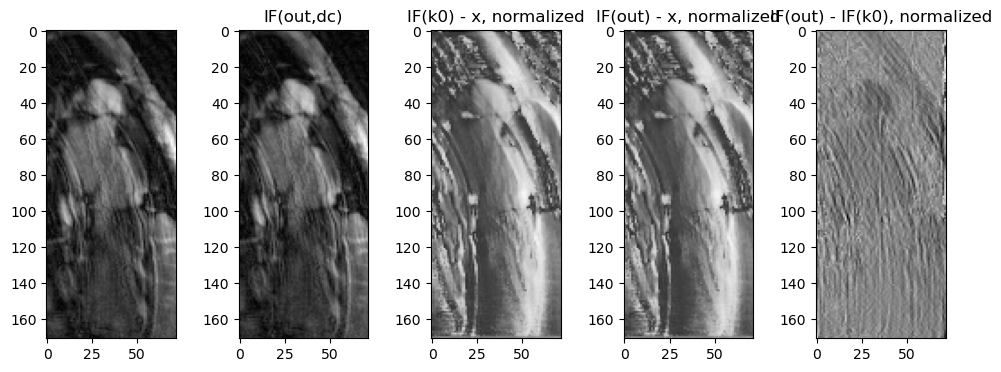

In [23]:
fig, ax = plt.subplots(1, 5, figsize=(12, 4))
x = np.load('0810_x_1.npy')
npy_to_ax(ax[0], '0810_x_1.npy')
k0 = np.load('0810_k0_1.npy')
mask = np.load('0810_mask_1.npy')
print(mask.shape)
mask = mask.real
mask = mask[0,0]

print(k0.shape)
ax[2].imshow(np.abs(ifft2c(k0[0,0])), cmap='gray')


 
def min_max_normalize(x):
    x = x - np.min(x)
    x = x / np.max(x)
    return x

x_n = min_max_normalize(np.abs(x[0,0]))
x_k0_n = min_max_normalize(np.abs(ifft2c(k0[0,0])))
ax[2].imshow(x_k0_n - x_n, cmap='gray')
ax[2].set_title('IF(k0) - x, normalized')



k = fft2c(x[0,0])
k0 = k0[0,0]
out = mask * k0 + (1 - mask) * k
ax[1].imshow((np.abs(ifft2c(out))), cmap='gray')
ax[1].set_title('IF(out,dc)')

out_n = min_max_normalize(np.abs(ifft2c(out)))
ax[3].imshow(out_n - x_n, cmap='gray')
ax[3].set_title('IF(out) - x, normalized')

ax[4].imshow(out_n - x_k0_n, cmap='gray')
ax[4].set_title('IF(out) - IF(k0), normalized')


(1, 9, 171, 72)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
